In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math
from sklearn.preprocessing import LabelEncoder

In [86]:
loan_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\LoanPrediction_Trainset.csv', parse_dates=True, delimiter=',')
# Make sure to display the personal file path on pc or laptop, and have the comma (,) sign as the delimiter. 
display(loan_data_01)

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [88]:
print(loan_data_01.to_string())

     Unnamed: 0    LoanID  Gender Married Dependents     Education SelfEmployed  ApplicantIncome  CoapplicantIncome  LoanAmount  LoanAmountTerm  CreditHistory PropertyArea LoanStatus
0             0  LP001002    Male      No          0      Graduate           No             5849           0.000000         NaN           360.0            1.0        Urban          Y
1             1  LP001003    Male     Yes          1      Graduate           No             4583        1508.000000       128.0           360.0            1.0        Rural          N
2             2  LP001005    Male     Yes          0      Graduate          Yes             3000           0.000000        66.0           360.0            1.0        Urban          Y
3             3  LP001006    Male     Yes          0  Not Graduate           No             2583        2358.000000       120.0           360.0            1.0        Urban          Y
4             4  LP001008    Male      No          0      Graduate           No      

In [90]:
# displaying the datatypes, for identifying whether the columns values are in int, object, string, or float. 
loan_data_01.dtypes

Unnamed: 0             int64
LoanID                object
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea          object
LoanStatus            object
dtype: object

In [92]:
# I dropped the column LoanID, since it contain unique identification numbers that should not have a mean, median, and other measurements. Also \
# the Unnamed: 0 column was dropped, because it functioned as an abundant index value and does not contain valuable data for any data extraction purpose)

loan_data_02 = loan_data_01.drop(columns=['LoanID', 'Unnamed: 0'])



In [94]:
# All object datatypes needed to be labeled and transfromed to integer data types in order to obtain the basic summary of all the relevant data columns 

loan_data_02['LoanStatus'] = loan_data_02['LoanStatus'].map(dict(Y=1, N=0))
loan_data_02['Gender'] = loan_data_02['Gender'].map(dict(Male=1, Female=0))
loan_data_02['Married'] = loan_data_02['Married'].map(dict(Yes=1, No=0))

#energy_data_01['Education'] = energy_data_01['Education'].map(dict(Graduate=1, Not Graduate=0))
loan_data_02['SelfEmployed'] = loan_data_02['SelfEmployed'].map(dict(Yes=1, No=0))
loan_data_02['PropertyArea'] = loan_data_02['PropertyArea'].map(dict(Rural=0, Semiurban=1, Urban=2))




In [96]:
# The data columns Dependents and Education couldnt be transformed by the standard python map function, so a more advanced method was applied (fit_transform)
# For info on the method: https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

le = LabelEncoder()
loan_data_02['Dependents'] = le.fit_transform(loan_data_02['Dependents'])
loan_data_02['Education'] = le.fit_transform(loan_data_02['Education'])

## Question 1: Basic summary of the train dataset

In [99]:
loan_data_02.describe()

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
count,601.000000,611.000000,614.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.842020,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.120531,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [101]:
#loan_data_01[['CoapplicantIncome','LoanAmount','LoanAmountTerm','CreditHistory']] = loan_data_01[['CoapplicantIncome','LoanAmount','LoanAmountTerm','CreditHistory']].astype('int64')

In [103]:
# displaying current datatypes of the dataset
loan_data_02.dtypes

Gender               float64
Married              float64
Dependents             int32
Education              int32
SelfEmployed         float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea           int64
LoanStatus             int64
dtype: object

In [105]:
# special check on the target variable LoanStatus, to see if the values are in the correct integer format
loan_data_02['LoanStatus']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: LoanStatus, Length: 614, dtype: int64

## Question 2: List the top five highly correlated variables

In [108]:
# data cleaning: for the purpose of computing the correlation between the data columns and the target variable the missing values needed to be removed \
# to obtain an equal number of datapoints on all the variables. 

loan_data_02 = loan_data_02.dropna()
loan_data_02

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,1.0,1.0,2,0,1.0,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [110]:
# Sources: 
# spearman method: https://stackoverflow.com/questions/55683088/compute-spearman-correlation-with-pandas
# sorting the corelation values: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

my_correlation = loan_data_02.corr(method="spearman")['LoanStatus']
sorted = my_correlation.sort_values(key=abs)
top5 = slice(6,-1)
print(sorted[top5])


LoanAmount      -0.040032
Gender           0.061191
Education       -0.078867
Married          0.106965
CreditHistory    0.542468
Name: LoanStatus, dtype: float64


The top 5 highly correlated variables with the target variable LoanStatus are according to the correlation calcalation: CreditHistory, Married, Education, Gender, and LoanAmount

#### Question 3

In [114]:
#printing the original dataset
print(loan_data_01.to_string())


     Unnamed: 0    LoanID  Gender Married Dependents     Education SelfEmployed  ApplicantIncome  CoapplicantIncome  LoanAmount  LoanAmountTerm  CreditHistory PropertyArea LoanStatus
0             0  LP001002    Male      No          0      Graduate           No             5849           0.000000         NaN           360.0            1.0        Urban          Y
1             1  LP001003    Male     Yes          1      Graduate           No             4583        1508.000000       128.0           360.0            1.0        Rural          N
2             2  LP001005    Male     Yes          0      Graduate          Yes             3000           0.000000        66.0           360.0            1.0        Urban          Y
3             3  LP001006    Male     Yes          0  Not Graduate           No             2583        2358.000000       120.0           360.0            1.0        Urban          Y
4             4  LP001008    Male      No          0      Graduate           No      

In [116]:
print(loan_data_01['Dependents'].value_counts())

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents'>

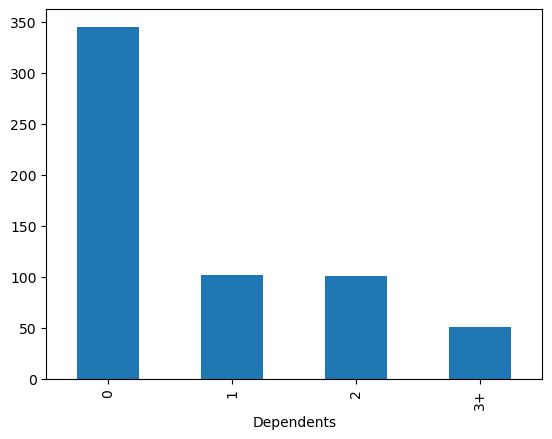

In [118]:
loan_data_01['Dependents'].value_counts().plot(kind='bar')
